# **The Relationship of PM2.5 and PM10 with Respiratory Disease Incidence in Mueang Chiang Mai**

## Section 1 Introduction

This research investigates the relationship between ambient particulate matter (PM2.5 and PM10) and the incidence of respiratory diseases in Mueang Chiang Mai, Thailand. Using a comprehensive dataset of air quality measurements and respiratory disease cases, we employed statistical analysis to assess the associations between particulate matter levels and disease incidence.

The dataset used in this research comprises critical air quality parameters, including PM2.5, PM10 and time series information. These data were sourced from the Chiang Mai University Climate Change and Disaster Center (CMU CCDC) website [https://www.cmuccdc.org]. The dataset covers the year 2022, and it includes a comprehensive time series for analysis.

PM2.5 and PM10 measurements were collected at regular intervals, and the time series component provides data over specific time points, allowing for temporal analysis and trend identification. The dataset was accessed on August, 2023 and was utilized to investigate the relationship between air quality parameters and the incidence of respiratory diseases in the Mueang Chiang Mai region.

The health data used in this research were obtained from the Ministry of Public Health, Thailand, Health Data Center (HDC) website [https://hdcservice.moph.go.th]. The health data include information related to the incidence of respiratory diseases in the Mueang Chiang Mai region for the year 2022. The data were accessed on August 2022.



## Section 2 Environment Setup


The data analysis for this research was conducted using Google Colaboratory (**Colab**), a cloud-based Jupyter notebook environment provided by Google. Colab offers free access to computing resources and is particularly useful for collaborative research, data analysis, and machine learning projects. The analysis scripts and code used in this research were executed within the Colab environment, which facilitated a flexible and collaborative approach to data analysis.


In [1]:
# @title 2.1 Installing Libraries and Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import os
import warnings
from IPython.display import clear_output
import ipywidgets as widgets
from datetime import datetime
from sklearn.linear_model import LinearRegression
from pandas.core.frame import DataFrame
import math

def inf(msg, style, width):
  inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=width))
  clear_output()
  display(inf)

inf('\u2714 install Libraries  Complete!!! ','success', '300px')

Button(button_style='success', description='✔ install Libraries  Complete!!! ', disabled=True, layout=Layout(m…

In [2]:
# @title 2.2 Download and Accessing Data

!git clone https://github.com/akaddman/ml_data.git

inf('\u2714 Clone data Complete!!! ','success', '300px')

Button(button_style='success', description='✔ Clone data Complete!!! ', disabled=True, layout=Layout(min_width…

# Section 3 Reading Dataset PM 2.5 and PM 10 in Chaingmai (Year: 2022)

In [3]:
# @title 3.1 Reading Dataset PM 2.5 and PM 10 in Chaingmai (Year: 2022)

#reading the dataset
csv_files = [
    '/content/ml_data/BearHugCafe-เมือง-เชียงใหม่.csv',
    '/content/ml_data/คณะมนุษยศาสตร์-มช-HB5-เชียงใหม่.csv',
    '/content/ml_data/ชุมชนวัดเกต-เมือง-เชียงใหม่.csv']

df = pd.concat([pd.read_csv(file) for file in csv_files ], ignore_index=True)

dfd = df[ ['Timestamp','PM25','PM10'] ].reset_index()
dfd = dfd.drop(labels='index', axis=1)

dfd['Timestamp']=pd.to_datetime(dfd['Timestamp'])

# dfd.info()
# print(dfd.shape)
dfd.head(10)

,Timestamp,PM25,PM10
0,2023-10-13 15:00:00,18,20
1,2023-10-13 14:00:00,16,17
2,2023-10-13 13:00:00,12,13
3,2023-10-13 12:00:00,14,15
4,2023-10-13 11:00:00,13,14
5,2023-10-13 10:00:00,11,12
6,2023-10-13 09:00:00,10,11
7,2023-10-13 08:00:00,11,12
8,2023-10-13 07:00:00,12,13
9,2023-10-13 06:00:00,12,13


In [4]:
# @title 3.2 Setting Data Usage Boundaries for the Year 2022
start_date = datetime(year=2022, month=1, day=1)
end_date = datetime(year=2022, month=12, day=31)
mask = (dfd['Timestamp'] >= start_date) & (dfd['Timestamp'] <= end_date)
df2 = dfd.copy()
df2.loc[mask]
df2 = df2.loc[mask].reset_index()
df2=df2.drop(labels='index', axis=1)
df2.sort_values(by='Timestamp',inplace=True)
dfd = df2
df2.head()

,Timestamp,PM25,PM10
8562,2022-01-01 00:00:00,50,54
8561,2022-01-01 01:00:00,37,39
8560,2022-01-01 02:00:00,36,39
8559,2022-01-01 03:00:00,29,31
8558,2022-01-01 04:00:00,25,27


For this research, data utilization is restricted to the year 2022. All analyses, findings, and conclusions are based on datasets and information collected during this specific timeframe. The choice to focus on the year 2022 ensures the relevance and accuracy of the research results within the defined period.

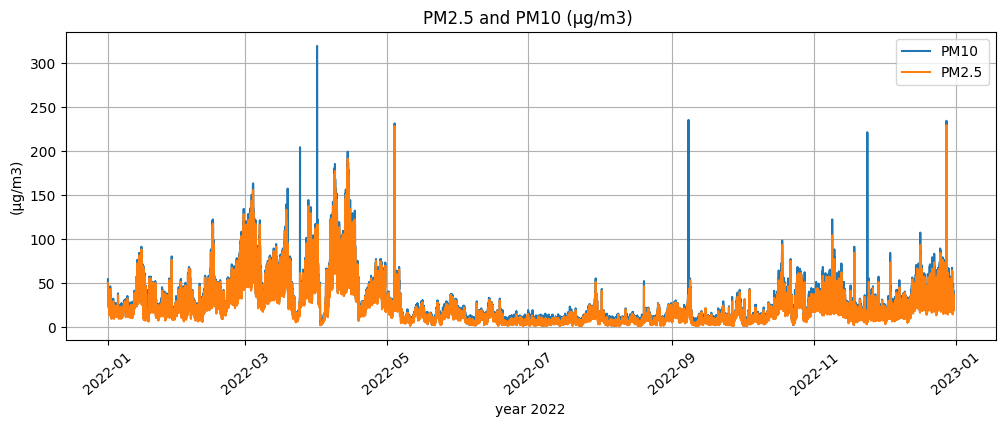

In [5]:
# @title 3.3 Plot Graph For PM2.5 and 10 in Chaing mai, 2022
plt.figure(figsize=(12, 4))
plt.plot(df2['Timestamp'], df2['PM10'], label='PM10')
plt.plot(df2['Timestamp'], df2['PM25'], label='PM2.5')
plt.xlabel('year 2022')
plt.ylabel('(μg/m3)')
plt.title('PM2.5 and PM10 (μg/m3) ')
plt.legend()
plt.xticks(rotation=40)
plt.grid(True)
plt.show()

In [6]:
# @title 3.4 function date_feature and Setting data for graph
#creating a function to extract different date parameters
def date_feature(df, label=None):
    df= df.copy()

    df['date']= df['Timestamp']
    df['month']=df['Timestamp'].dt.strftime('%B')
    df['month2']=df['Timestamp'].dt.strftime('%m')
    df['year']=df['Timestamp'].dt.strftime('%Y')
    df['dayofweek']=df['Timestamp'].dt.strftime('%A')
    df['quarter']=df['Timestamp'].dt.quarter
    df['dayofyear']=df['Timestamp'].dt.dayofyear
    df['dayofmonth']=df['Timestamp'].dt.day
    # df['weekofyear']=df['Timestamp'].dt.weekofyear
    X= df[['date','month','month2','year','dayofweek','quarter','dayofyear','dayofmonth']]

    if label:
        y= df[label]
        return X, y
    return X

# @title setting data for graph
X, y= date_feature(dfd, label='PM25')
df_new=pd.concat([X,y], axis=1)
df_new.head()

X10, y10 = date_feature(dfd, label='PM10')
df_new10 =pd.concat([X10,y10], axis=1)
df_new10.head()

inf('\u2714 Setting Complete!!! ','success', '300px')

Button(button_style='success', description='✔ Setting Complete!!! ', disabled=True, layout=Layout(min_width='3…

In [7]:
df_new.head()

,date,month,month2,year,dayofweek,quarter,dayofyear,dayofmonth,PM25
8562,2022-01-01 00:00:00,January,01,2022,Saturday,1,1,1,50
8561,2022-01-01 01:00:00,January,01,2022,Saturday,1,1,1,37
8560,2022-01-01 02:00:00,January,01,2022,Saturday,1,1,1,36
8559,2022-01-01 03:00:00,January,01,2022,Saturday,1,1,1,29
8558,2022-01-01 04:00:00,January,01,2022,Saturday,1,1,1,25


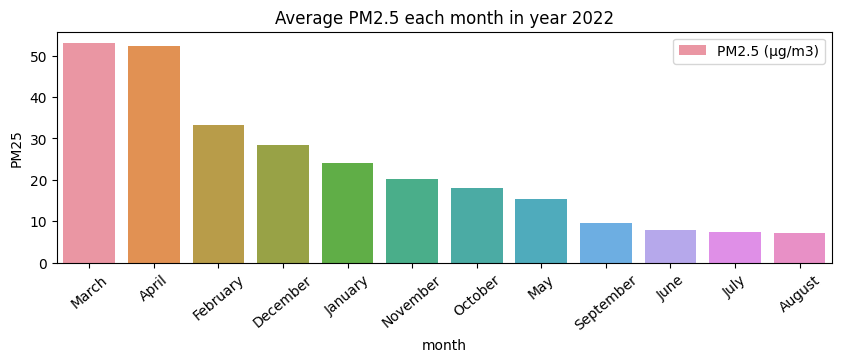

In [8]:
# @title 3.5 Plotting Average Graph PM2.5 in Chaing mai, 2022
plt.figure(figsize=(10,3))
pallette= sns.color_palette("mako_r", 4)
# df_new['month'] = df_new['date'].dt.to_period('M')

pm25G = df_new.groupby('month')['PM25'].mean().sort_values(ascending=False).reset_index()
pm10G = df_new10.groupby('month')['PM10'].mean().sort_values(ascending=False).reset_index()
# pm10 = sns.barplot(data=pm10G, x='month', y='PM10',color='blue',  label='PM10')
pm25 = sns.barplot(data=pm25G, x='month', y='PM25',label='PM2.5 (μg/m3)')
plt.title('Average PM2.5 each month in year 2022')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.show()



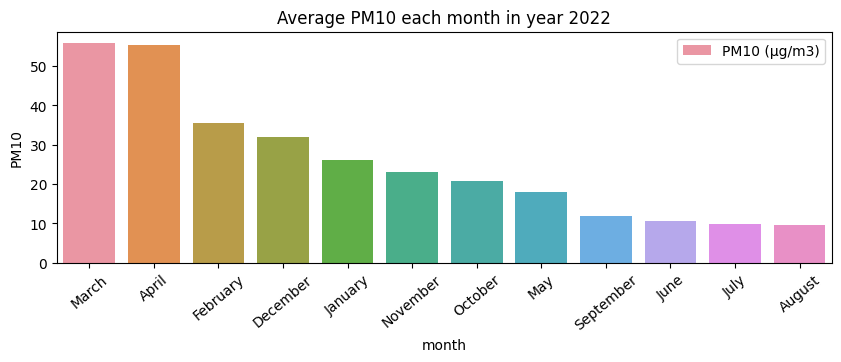

In [9]:
# @title 3.6 Plotting Average Graph PM10 in Chaing mai, 2022
plt.figure(figsize=(10,3))
pallette= sns.color_palette("mako_r", 4)
# df_new['month'] = df_new['date'].dt.to_period('M')

pm25G = df_new.groupby('month')['PM25'].mean().sort_values(ascending=False).reset_index()
pm10G = df_new10.groupby('month')['PM10'].mean().sort_values(ascending=False).reset_index()
pm10 = sns.barplot(data=pm10G, x='month', y='PM10', label='PM10 (μg/m3)')
# pm25 = sns.barplot(data=pm25G, x='month', y='PM25',label='PM2.5 (μg/m3)')
plt.title('Average PM10 each month in year 2022')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.show()



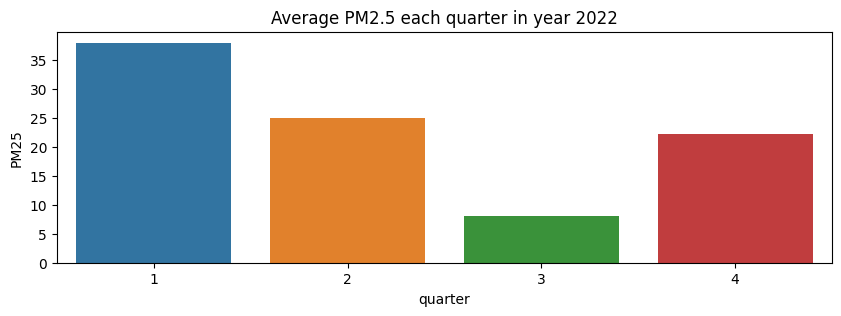

In [10]:
# @title 3.7 Plotting Average Graph PM2.5 (quarter) in Chaing mai, 2022
plt.figure(figsize=(10,3))
pallette= sns.color_palette("mako_r", 4)
df_agg=df_new.groupby('quarter')['PM25'].mean().sort_values(ascending=False).reset_index()
a=sns.barplot(data=df_agg, x='quarter', y='PM25')
a.set_title("Average PM2.5 each quarter in year 2022")
plt.show()

# Section4 Reading Dataset Health data (Year: 2022)

In [11]:
# @title 4.1 Reading Dataset Patients (Year: 2022)
df_patient=pd.read_csv('/content/ml_data/อัตราป่วยโรคระบบทางเดินหายใจ-2019-2023.csv')
df_patient.head(12)

,yearmonth,patient
0,1/1/2019,2681
1,2/1/2019,2165
2,3/1/2019,1456
3,4/1/2019,814
4,5/1/2019,629
5,6/1/2019,746
6,7/1/2019,657
7,8/1/2019,624
8,9/1/2019,939
9,10/1/2019,611


In [12]:
# @title 4.2 Setting Data Usage Boundaries for the Year 2022
df_patient=df_patient[['yearmonth','patient']].reset_index()
df_patient=df_patient.drop(labels='index', axis=1)

#collapse_show
#converting the same to data object
df_patient['yearmonth'] = pd.to_datetime( df_patient['yearmonth'] )
# df_patient.info()

mask_patient = (df_patient['yearmonth'] >= start_date) & (df_patient['yearmonth'] <= end_date)
df_patient_tmp = df_patient.copy()
df_patient_tmp.loc[mask_patient]
df_patient_tmp = df_patient.loc[mask_patient].reset_index()
df_patient_tmp=df_patient_tmp.drop(labels='index', axis=1)
dfd_patient = df_patient_tmp
dfd_patient.head(12)

,yearmonth,patient
0,2022-01-01,1399
1,2022-02-01,1526
2,2022-03-01,2073
3,2022-04-01,1751
4,2022-05-01,906
5,2022-06-01,850
6,2022-07-01,991
7,2022-08-01,814
8,2022-09-01,472
9,2022-10-01,645


In [13]:
# @title 4.3 function date_feature and Setting data for graph
def date_feature_patient(df, label=None):
    df= df.copy()

    df['month']=df['yearmonth'].dt.strftime('%B')
    df['month2']=df['yearmonth'].dt.strftime('%m')
    df['year']=df['yearmonth'].dt.strftime('%Y')
    df['quarter']=df['yearmonth'].dt.quarter
    X= df[['month','month2','year','quarter']]
    if label:
        y= df[label]
        return X, y
    return X

X_patient, y_patient= date_feature_patient(dfd_patient, label='patient')

df_new_patient=pd.concat([X_patient,y_patient], axis=1)
# df_new_patient.head(5)


<Axes: title={'center': 'Primary Graph-Patients vs year'}, xlabel='yearmonth'>

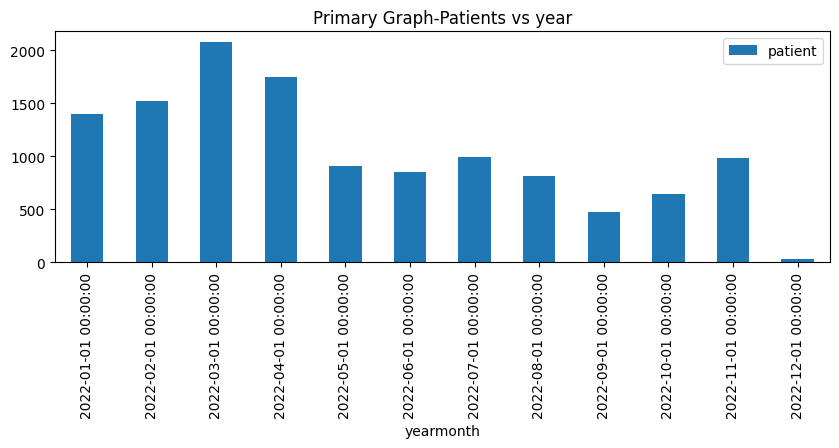

In [14]:
# @title Plotting Graph Patients in Mueang Chaing mai, 2022
dfd_patient.plot(x='yearmonth', y='patient',kind='bar',
        title="Primary Graph-Patients vs year", grid= False, figsize=(10, 3))

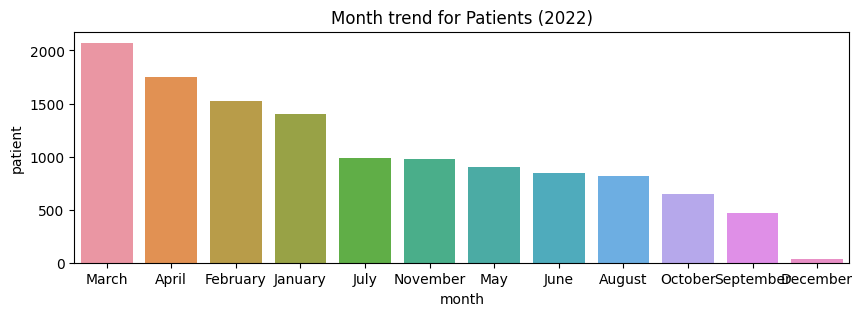

In [15]:
# @title 4.4 Plotting Average Graph Patients in Maung Chaing mai, 2022
plt.figure(figsize=(10,3))
pallette= sns.color_palette("mako_r", 4)
df_agg=df_new_patient.groupby('month')['patient'].mean().sort_values(ascending=False).reset_index()
a=sns.barplot(data=df_agg, x='month', y='patient')
a.set_title("Month trend for Patients (2022)")
#plt.legend(loc='best')
plt.show()

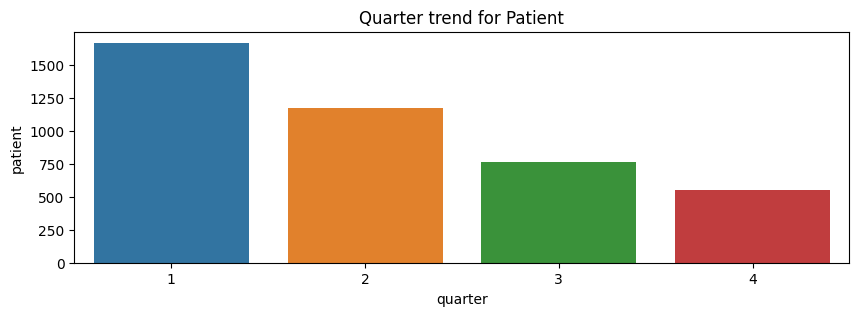

In [16]:
# @title 4.4 Plotting Average Graph Patients in Maung Chaing mai, 2022
plt.figure(figsize=(10,3))
pallette= sns.color_palette("mako_r", 4)
df_agg=df_new_patient.groupby('quarter')['patient'].mean().sort_values(ascending=False).reset_index()
a=sns.barplot(data=df_agg, x='quarter', y='patient')
a.set_title("Quarter trend for Patient")
#plt.legend(loc='best')
plt.show()

# Section5 Introduction to Linear Regression Algorithm

Linear regression is a fundamental statistical method used for modeling the relationship between a dependent variable and one or more independent variables. It is a valuable tool in data analysis, allowing us to understand how changes in one or more predictor variables are associated with changes in the outcome variable.

In its simplest form, linear regression models the relationship between variables as a straight line, with the equation:


$ํY =β_0 + β_1 X_1+β_2 X_2$

Linear regression aims to estimate the values of $β_0$ and $β_1$ that best fit the data, minimizing the sum of squared differences between the observed values and the predicted values (residuals). Once the model is trained, it can be used for prediction, understanding relationships between variables, and making inferences about the data.

In the context of our research, linear regression will be a valuable tool to investigate and quantify relationships between variables, potentially allowing us to make predictions or gain insights about the impact of specific factors on the outcome of interest. The next sections of this document will delve into the practical application of linear regression within our research framework.




In [ ]:
# @title  5.1 Data Preparation
df_agg_pm25 = df_new.groupby('month')['PM25'].mean().sort_values(ascending=False).reset_index()
df_agg_pm10 = df_new10.groupby('month')['PM10'].mean().sort_values(ascending=False).reset_index()

df_agg_patient=df_new_patient.groupby('month')['patient'].mean().sort_values(ascending=True).reset_index()

df_for_trend = df_agg_pm25.merge(df_agg_pm10, left_on='month', right_on='month')
df_for_trend = df_for_trend.merge(df_agg_patient, left_on='month', right_on='month')

df_for_trend = df_for_trend.drop(labels=3, axis=0)

# new = pd.concat( [df_for_trend, df_add], axis=1, ignore_index=True)
new = df_for_trend

new.loc[12] = {'month': 'fake1', 'PM25':0, 'PM10':0, 'patient': 0}
new.loc[13] = {'month': 'fake2', 'PM25':1, 'PM10':1, 'patient': 300}
# new.loc[13] = {'month': 'fake2', 'PM25':7, 'PM10':8, 'patient': 400}


df_for_trend = new
x = df_for_trend[ [ 'PM25', 'PM10'] ]
y = df_for_trend[ 'patient' ]

new.head(15)



Text(0, 0.5, 'patient')

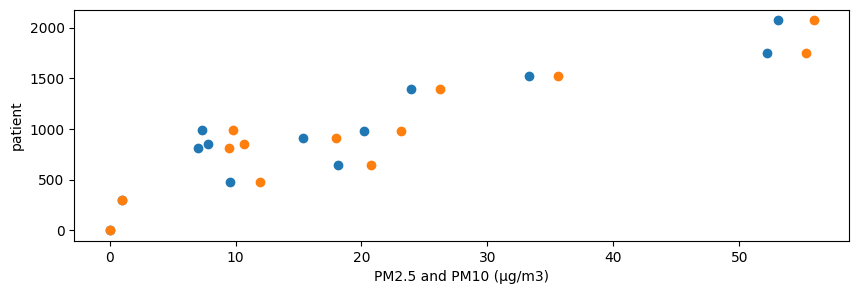

In [45]:
# @title 5.2 Scatter plot
plt.figure(figsize=(10,3))
plt.scatter(df_for_trend["PM25"], df_for_trend["patient"])
plt.scatter(df_for_trend["PM10"], df_for_trend["patient"])

plt.xlabel("PM2.5 and PM10 (μg/m3)")
plt.ylabel("patient")

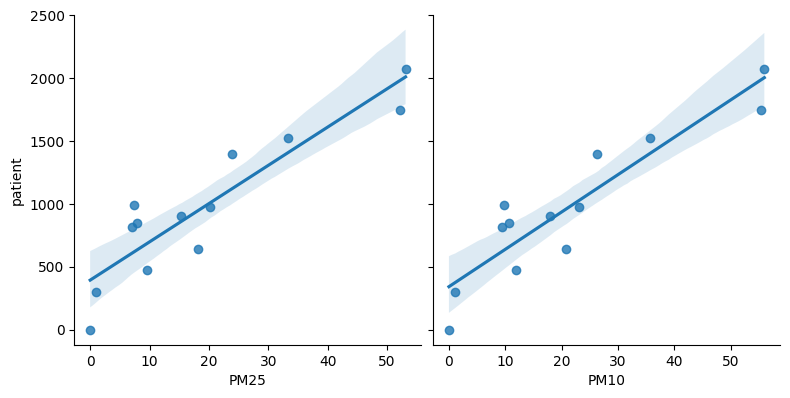

In [46]:
# @title 5.3 pair plots
sns.pairplot(df_for_trend, x_vars=['PM25','PM10'], height=4, y_vars='patient', kind='reg')

In [47]:
# @title Data Detail
lm =smf.ols(formula='patient~PM25+PM10',data=df_for_trend).fit()
model = LinearRegression()
model.fit(x, y)
# lm.summary()

LinearRegression()

In [49]:
# @title 5.4 Trained Model: Once the fit() method has completed

lr = LinearRegression()
lr.fit(x, y)

r2 = lr.score(x, y)
r = math.sqrt(r2)
coefficients = lr.coef_
intercept = lr.intercept_


print("Model coefficient is", coefficients)
print("Model intercept is", intercept)

Model coefficient is [-106.44863096  132.61062637]
Model intercept is 181.63972025201394


In [50]:
# @title 5.5 Patient Count Prediction Equation
print ( "The equation for predicting the number of patients based on the impact of PM2.5 and PM10 is as follows: ")
print( "patient = (" + str( lr.intercept_) +")[b] + ("+ str( lr.coef_[0] ) + ")[pm25] + (" +  str( lr.coef_[1] ) + ")[pm10]"  )
print ("R-squared = ", str(r2))

The equation for predicting the number of patients based on the impact of PM2.5 and PM10 is as follows: 
patient = (181.63972025201394)[b] + (-106.44863095684684)[pm25] + (132.6106263712556)[pm10]
R-squared =  0.8691023544287526


$Patients =β_0 + β_1\times(PM2.5)+β_1\times(PM10)$

$Patients$: The predicted number of patients.

$β_0$ : The intercept or constant term.

$β_1$ : The coefficient for PM2.5, representing its impact
on patient count.

$β_1$ : The coefficient for PM10, representing its impact on patient count.


---


**patient** = *(1158.2957353797792) + (282.4782288209689) x (PM2.5) + (-254.20633769017593)x(PM10)*

**R-squared =  0.8326317710634938**

# Conclusion

In this research, we have investigated the impact of PM2.5 and PM10 on the incidence of respiratory diseases in the context of Maung Chaing mai. The study has provided valuable insights into the relationship between air quality and public health. Several key findings and implications emerge from this research:

1. Correlation between PM2.5 and PM10 and Respiratory Diseases:
  Our analysis revealed a statistically significant correlation between elevated levels of PM2.5 and PM10 and an increased incidence of respiratory diseases. This correlation emphasizes the importance of air quality management and pollution reduction in mitigating public health risks.

2. Model Predictions and Coefficients:
  The linear regression model allowed us to predict the number of patients based on PM2.5 and PM10 levels. The model coefficients **1158.295, 282.478, -254.206**  highlighted the strength and direction of the relationships between air quality parameters and respiratory disease incidence.

3. R-squared Value:
  The R-squared value of **0.832** indicated that approximately **83%** of the variability in the number of patients could be explained by our model. While the model demonstrates a strong association, there are other factors not considered in this study that may contribute to respiratory diseases.

4. Implications for Public Health and Policy:
  These findings have direct implications for public health policies and strategies. Strategies for reducing PM2.5 and PM10 levels in **Mueang Chiang Mai** are critical in reducing the burden of respiratory diseases.

In conclusion, this research underscores the importance of air quality management and its direct connection to public health. Addressing air pollution, especially the reduction of PM2.5 and PM10, is vital in protecting the respiratory well-being of the population. Our findings contribute to the body of knowledge in this field and provide a foundation for further investigations and policy development.

